# **Import Required library**

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset



In [ ]:
file_path = "/content/apple_quality.csv"
data = pd.read_csv(file_path)
print(data.head())

# Feature Engineering


### Drop Column which is not used in our prediction

In [ ]:
data.drop('A_id', axis=1, inplace=True)
print(data.head())

### Change Data type of quality from Object to bimary
### 0 for bad and 1 for good

In [ ]:
# Encode the target variable "Quality" into binary values (0 for "bad" and 1 for "good")
data['Quality'] = np.where(data['Quality'] == 'bad', 0, 1)

In [ ]:
print(data.head())

### Convert object values to numeric for the "Acidity" column


In [ ]:
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

### Check for null values and drop rows with null values


In [ ]:
print("Total null values: ", data.isnull().sum().sum())
data.dropna(inplace=True)

### Display information about the DataFrame


In [ ]:
print(data.info())

# Split dataset into features and labels

In [ ]:
X = data.drop('Quality', axis=1)
y = data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train logistic regression models using GridsearchCV

In [83]:
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'newton-cg', 'lbfgs']}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)


## Train random forest classifiers using GridsearchCV

In [84]:
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 30, 50], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)


# Function to plot confusion matrix


In [76]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model

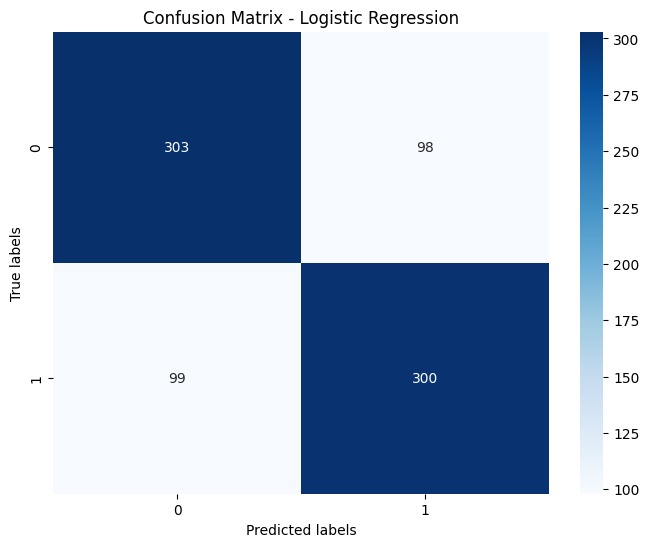

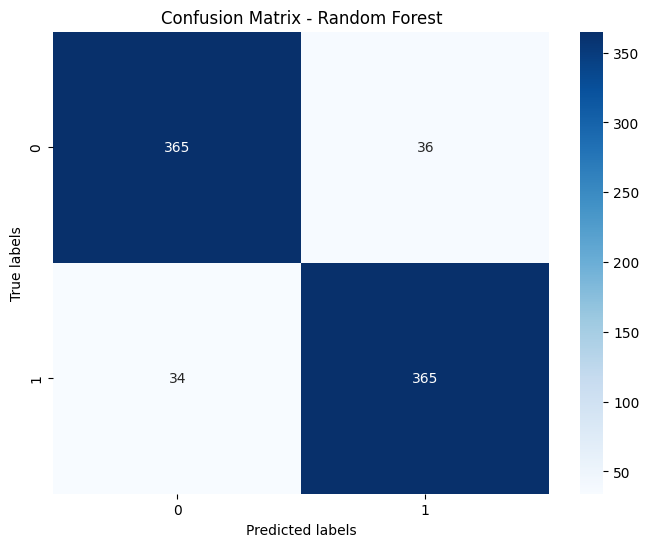

In [77]:
plot_confusion_matrix(y_test, y_pred_log_reg, 'Confusion Matrix - Logistic Regression')
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')

# Print accuracies


In [78]:
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Precision:", log_reg_precision)
print("Logistic Regression Recall:", log_reg_recall)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)

Logistic Regression Accuracy: 0.75375
Logistic Regression Precision: 0.7537688442211056
Logistic Regression Recall: 0.7518796992481203
Random Forest Accuracy: 0.9125
Random Forest Precision: 0.9102244389027432
Random Forest Recall: 0.9147869674185464
